In [1]:
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import librosa.display
import IPython.display as ipd

## Reading Dataset

In [3]:
import pandas as pd
df1=pd.read_excel('Healthy_data.xlsx')
df2=pd.read_excel('Pathological_data.xlsx')
df=pd.concat([df1,df2], ignore_index=True)

df.head(10)

,Recording Id,Type,Gender,Age,Diagnosis Notes,Pathology,Audio
3,4,n,m,22,Normal,Normal,4-a_n.wav
4,5,n,m,22,Normal,Normal,5-a_n.wav
10,9,n,m,25,Normal,Normal,9-a_n.wav
13,11,n,m,23,Normal,Normal,11-a_n.wav
17,15,n,m,24,Normal,Normal,15-a_n.wav
29,29,n,m,58,Normal,Normal,29-a_n.wav
32,32,n,m,45,Normal,Normal,32-a_n.wav
41,40,n,m,20,Normal,Normal,40-a_n.wav
42,41,n,m,20,Normal,Normal,41-a_n.wav
44,43,n,m,32,Normal,Normal,43-a_n.wav


In [4]:
df.shape

(561, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 3 to 1358
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Recording Id     561 non-null    int64 
 1   Type             561 non-null    object
 2   Gender           561 non-null    object
 3   Age              561 non-null    int64 
 4   Diagnosis Notes  534 non-null    object
 5   Pathology        561 non-null    object
 6   Audio            561 non-null    object
dtypes: int64(2), object(5)
memory usage: 35.1+ KB


In [6]:
type_gender_count = df.groupby(["Type","Gender"])[['Audio']].count()
type_gender_count

,,Audio
Type,Gender,
n,m,259
p,m,302


<Axes: xlabel='Type,Gender'>

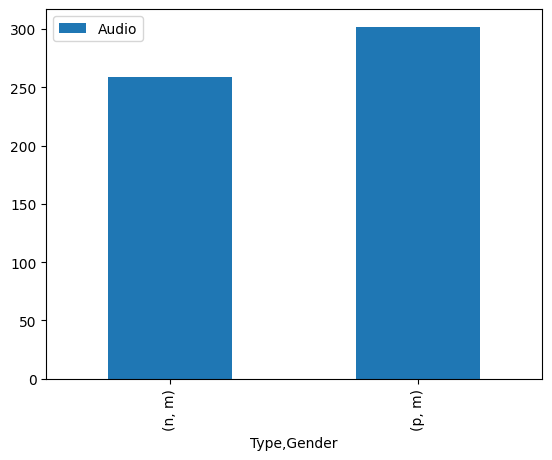

In [7]:
type_gender_count.plot.bar()

In [8]:
gender = df.Gender.unique()
pathology = df.Pathology.unique()
print(gender)
print(pathology)

['m']
['Normal' 'Dysphonia' 'Laryngitis' 'Recurrent palsy']


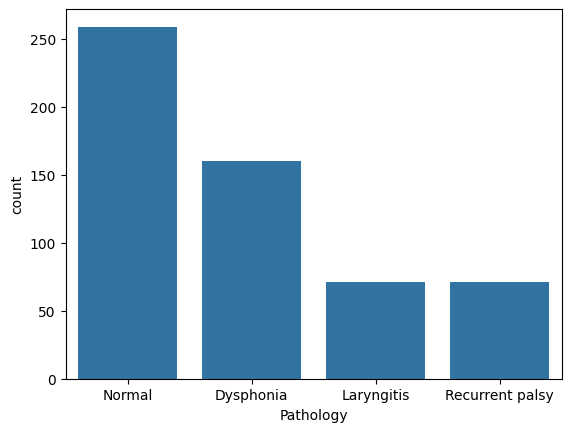

In [9]:
sns.countplot(x=df["Pathology"])
plt.show()

## Extract Features

In [10]:
## Extracting MFCC's for every audio file
import pandas as pd
import os

audio_dataset_path = 'Filtered_Audio_Dataset/'

In [11]:
def features_extraction(file):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, n_mfcc=80)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

In [12]:
import numpy as np
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = audio_dataset_path+row["Audio"]
    final_class_labels = row["Type"]
    data = features_extraction(file_name)
    extracted_features.append([data,final_class_labels])

561it [00:05, 106.67it/s]


In [13]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[-279.40063, 208.5046, -43.03498, -5.360972, -...",n
1,"[-172.24774, 175.08725, -75.93269, 8.99103, -6...",n
2,"[-160.34767, 238.37305, -50.651237, -8.1686945...",n
3,"[-174.26558, 202.43498, -48.88869, 26.138357, ...",n
4,"[-178.27687, 191.5492, -72.10441, 7.839301, -4...",n
5,"[-197.26646, 189.61101, -47.13572, 9.000772, -...",n
6,"[-228.07176, 183.02597, -31.626911, -15.123821...",n
7,"[-235.79805, 207.87103, -39.370472, -27.216578...",n
8,"[-332.56256, 205.95406, -61.05219, 7.6796494, ...",n
9,"[-147.25772, 178.20045, -82.12582, 1.9781523, ...",n


In [14]:
extracted_features_df.shape

(561, 2)

In [15]:
extracted_features_df["feature"][0]

array([-2.7940063e+02,  2.0850459e+02, -4.3034981e+01, -5.3609719e+00,
       -5.2530403e+01, -8.8619261e+00, -7.6732415e-01,  6.7943349e+00,
        1.0799702e+01, -1.3331823e+00,  8.6732759e+00, -7.2678752e+00,
        1.8010962e+01,  1.9159014e+01, -2.7179031e+01, -1.2447955e+01,
        1.8915423e+00, -1.5298142e+01, -4.0988545e+00,  1.8953447e+00,
        4.7810760e+00, -3.4840662e+00, -1.6979162e+01, -3.4267972e+00,
        4.2249260e+00, -9.3542862e+00, -7.8552189e+00, -2.2184309e-01,
       -7.5720377e+00, -6.0218911e+00, -9.1817122e+00,  6.1179090e+00,
        4.7846541e+00, -8.6046515e+00,  1.2105453e+01, -1.6410214e+00,
       -9.7464371e+00,  3.2591763e+00, -8.6933661e+00, -5.1998725e+00,
        3.8980737e+00, -7.4412656e+00, -5.7363014e+00, -3.9971590e+00,
       -6.7316098e+00, -3.1640453e+00, -6.6905761e+00, -3.9208169e+00,
       -3.4986355e+00, -3.5767493e+00, -3.5865269e+00, -6.1424880e+00,
       -8.7377186e+00, -6.3181624e+00, -2.7753470e+00, -4.7034574e+00,
      

In [16]:
## Label Encoding
dummy_data = pd.get_dummies(extracted_features_df['class'])

In [17]:
dummy_data

,n,p
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
556,False,True
557,False,True
558,False,True
559,False,True


In [18]:
x=np.array(extracted_features_df['feature'].values.tolist())
y=dummy_data

In [19]:
x.shape

(561, 80)

In [20]:
y.shape

(561, 2)

In [21]:
### Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify= y, test_size=0.2,random_state=0)

In [22]:
x_train.shape

(448, 80)

In [23]:
x_test.shape

(113, 80)

In [24]:
y_train.shape

(448, 2)

In [25]:
y_test.shape

(113, 2)

## Model Training

In [26]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
## No. of classes
num_labels=y.shape[1]
num_labels

2

In [29]:
model=Sequential()
## first layer
model.add(Dense(256,input_shape=(80,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## second layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## third layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               20736     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               1

In [32]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=150
num_batch_size=32

checkpointer=ModelCheckpoint(filepath='/audio_classification.hdf5', verbose=1, save_best_only=True)
start=datetime.now()

model.fit(x_train,y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test,y_test), callbacks=[checkpointer])
duration=datetime.now()-start

print("Training completed in time: ",duration)

Epoch 1/150
12/14 [========================>.....] - ETA: 0s - loss: 13.7816 - accuracy: 0.4974 
Epoch 1: val_loss improved from inf to 1.87221, saving model to /audio_classification.hdf5
14/14 [==============================] - 2s 76ms/step - loss: 13.1477 - accuracy: 0.5022 - val_loss: 1.8722 - val_accuracy: 0.5575
Epoch 2/150
14/14 [==============================] - ETA: 0s - loss: 7.7492 - accuracy: 0.5357
Epoch 2: val_loss did not improve from 1.87221
14/14 [==============================] - 0s 7ms/step - loss: 7.7492 - accuracy: 0.5357 - val_loss: 2.6637 - val_accuracy: 0.4602
Epoch 3/150
13/14 [==========================>...] - ETA: 0s - loss: 5.7355 - accuracy: 0.5168

C:\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss improved from 1.87221 to 0.97935, saving model to /audio_classification.hdf5
14/14 [==============================] - 0s 11ms/step - loss: 5.7299 - accuracy: 0.5134 - val_loss: 0.9793 - val_accuracy: 0.6018
Epoch 4/150
 5/14 [=========>....................] - ETA: 0s - loss: 4.9261 - accuracy: 0.5750
Epoch 4: val_loss did not improve from 0.97935
14/14 [==============================] - 0s 10ms/step - loss: 4.9483 - accuracy: 0.5848 - val_loss: 1.4213 - val_accuracy: 0.5841
Epoch 5/150
 1/14 [=>............................] - ETA: 0s - loss: 5.4313 - accuracy: 0.5312
Epoch 5: val_loss improved from 0.97935 to 0.78608, saving model to /audio_classification.hdf5
14/14 [==============================] - 0s 9ms/step - loss: 4.4024 - accuracy: 0.5022 - val_loss: 0.7861 - val_accuracy: 0.5752
Epoch 6/150
 1/14 [=>............................] - ETA: 0s - loss: 3.5916 - accuracy: 0.5625
Epoch 6: val_loss improved from 0.78608 to 0.66937, saving model to /audio_classificatio

Epoch 33/150
14/14 [==============================] - ETA: 0s - loss: 0.7155 - accuracy: 0.6384
Epoch 33: val_loss did not improve from 0.62850
14/14 [==============================] - 0s 7ms/step - loss: 0.7155 - accuracy: 0.6384 - val_loss: 0.6334 - val_accuracy: 0.6814
Epoch 34/150
14/14 [==============================] - ETA: 0s - loss: 0.6881 - accuracy: 0.6451
Epoch 34: val_loss did not improve from 0.62850
14/14 [==============================] - 0s 7ms/step - loss: 0.6881 - accuracy: 0.6451 - val_loss: 0.6393 - val_accuracy: 0.6460
Epoch 35/150
 1/14 [=>............................] - ETA: 0s - loss: 0.7399 - accuracy: 0.6875
Epoch 35: val_loss did not improve from 0.62850
14/14 [==============================] - 0s 7ms/step - loss: 0.7552 - accuracy: 0.6183 - val_loss: 0.6458 - val_accuracy: 0.6106
Epoch 36/150
 1/14 [=>............................] - ETA: 0s - loss: 0.6638 - accuracy: 0.6875
Epoch 36: val_loss did not improve from 0.62850
14/14 [==============================

Epoch 62/150
13/14 [==========================>...] - ETA: 0s - loss: 0.5349 - accuracy: 0.7260
Epoch 62: val_loss did not improve from 0.59933
14/14 [==============================] - 0s 8ms/step - loss: 0.5390 - accuracy: 0.7277 - val_loss: 0.6117 - val_accuracy: 0.6372
Epoch 63/150
13/14 [==========================>...] - ETA: 0s - loss: 0.5112 - accuracy: 0.7163
Epoch 63: val_loss did not improve from 0.59933
14/14 [==============================] - 0s 8ms/step - loss: 0.5218 - accuracy: 0.7121 - val_loss: 0.6115 - val_accuracy: 0.6460
Epoch 64/150
12/14 [========================>.....] - ETA: 0s - loss: 0.4857 - accuracy: 0.7604
Epoch 64: val_loss did not improve from 0.59933
14/14 [==============================] - 0s 8ms/step - loss: 0.4824 - accuracy: 0.7634 - val_loss: 0.6178 - val_accuracy: 0.6549
Epoch 65/150
 1/14 [=>............................] - ETA: 0s - loss: 0.5369 - accuracy: 0.6562
Epoch 65: val_loss did not improve from 0.59933
14/14 [==============================

Epoch 92/150
12/14 [========================>.....] - ETA: 0s - loss: 0.3776 - accuracy: 0.8125
Epoch 92: val_loss did not improve from 0.59855
14/14 [==============================] - 0s 8ms/step - loss: 0.3670 - accuracy: 0.8214 - val_loss: 0.6856 - val_accuracy: 0.6991
Epoch 93/150
 1/14 [=>............................] - ETA: 0s - loss: 0.3138 - accuracy: 0.9375
Epoch 93: val_loss did not improve from 0.59855
14/14 [==============================] - 0s 7ms/step - loss: 0.3197 - accuracy: 0.8616 - val_loss: 0.6722 - val_accuracy: 0.6726
Epoch 94/150
13/14 [==========================>...] - ETA: 0s - loss: 0.3497 - accuracy: 0.8438
Epoch 94: val_loss did not improve from 0.59855
14/14 [==============================] - 0s 8ms/step - loss: 0.3476 - accuracy: 0.8460 - val_loss: 0.6908 - val_accuracy: 0.6549
Epoch 95/150
14/14 [==============================] - ETA: 0s - loss: 0.3422 - accuracy: 0.8616
Epoch 95: val_loss did not improve from 0.59855
14/14 [==============================

Epoch 122/150
 1/14 [=>............................] - ETA: 0s - loss: 0.2609 - accuracy: 0.8438
Epoch 122: val_loss did not improve from 0.59855
14/14 [==============================] - 0s 6ms/step - loss: 0.1841 - accuracy: 0.9196 - val_loss: 1.0537 - val_accuracy: 0.6549
Epoch 123/150
 1/14 [=>............................] - ETA: 0s - loss: 0.1417 - accuracy: 0.9375
Epoch 123: val_loss did not improve from 0.59855
14/14 [==============================] - 0s 6ms/step - loss: 0.1518 - accuracy: 0.9397 - val_loss: 1.0042 - val_accuracy: 0.6549
Epoch 124/150
14/14 [==============================] - ETA: 0s - loss: 0.1509 - accuracy: 0.9442
Epoch 124: val_loss did not improve from 0.59855
14/14 [==============================] - 0s 7ms/step - loss: 0.1509 - accuracy: 0.9442 - val_loss: 1.0432 - val_accuracy: 0.6549
Epoch 125/150
 1/14 [=>............................] - ETA: 0s - loss: 0.1969 - accuracy: 0.9062
Epoch 125: val_loss did not improve from 0.59855
14/14 [======================

In [33]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.6814159154891968


In [34]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [35]:
y_pred

array([[7.66414881e-01, 2.33585119e-01],
       [2.44138297e-04, 9.99755919e-01],
       [8.16501852e-05, 9.99918342e-01],
       [9.90994751e-01, 9.00530629e-03],
       [9.96549964e-01, 3.44999041e-03],
       [7.47256935e-01, 2.52743006e-01],
       [6.42623831e-07, 9.99999404e-01],
       [9.62184489e-01, 3.78155373e-02],
       [9.99999523e-01, 4.46736721e-07],
       [1.00000000e+00, 2.19152803e-08],
       [9.46994603e-01, 5.30054420e-02],
       [5.82773425e-03, 9.94172275e-01],
       [1.63138136e-02, 9.83686149e-01],
       [9.98792648e-01, 1.20732212e-03],
       [2.04502430e-04, 9.99795496e-01],
       [9.99999881e-01, 1.21730139e-07],
       [2.10654318e-01, 7.89345682e-01],
       [9.99713957e-01, 2.86065915e-04],
       [9.99975324e-01, 2.46846939e-05],
       [9.99861479e-01, 1.38469011e-04],
       [2.95281779e-07, 9.99999762e-01],
       [9.80574489e-01, 1.94254462e-02],
       [2.71078795e-01, 7.28921175e-01],
       [7.09911510e-02, 9.29008842e-01],
       [3.926236

In [36]:
y_test.values

array([[ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [Fal

4/4 [==============================] - 0s 7ms/step


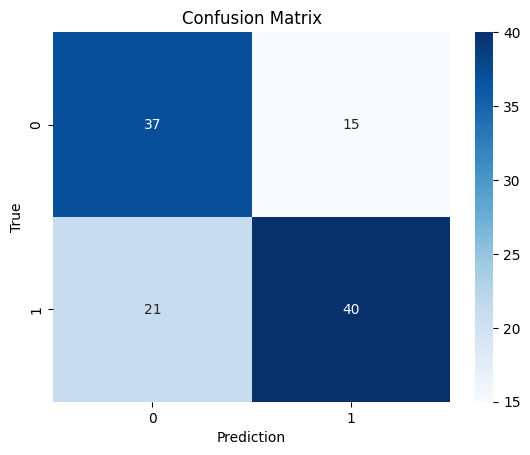

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#compute confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

#Plot confusion matrix
sns.heatmap( conf_matrix, annot=True, fmt='d', cmap= 'Blues')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Model Evaluation

In [43]:
filename = 'Male_Female_Healthy_Dataset/1004-a_n.wav'

In [44]:
feature_df = pd.DataFrame(features_extraction(filename)).transpose()

In [45]:
feature_df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-149.225266,174.276077,-18.307064,10.403212,-66.140961,-11.231764,-8.218404,-4.863341,-25.08256,-1.205913,...,0.736559,-0.999705,-1.608087,-2.276558,0.696951,-0.647705,0.926778,-2.020046,-1.749156,-0.680004


In [46]:
features = np.array(feature_df.values.tolist())

In [47]:
features.shape

(1, 80)

In [48]:
model.predict(features)

1/1 [==============================] - 0s 29ms/step


array([[1.7233279e-04, 9.9982762e-01]], dtype=float32)